In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [116]:
df=pd.read_csv("C:\\Users\\15771\\Downloads\\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### 可以看到数据字段包括 
#### RANK-总销售额的排名
#### Name-游戏的名字
#### Platform-游戏发布平台(即PC,PS4等)
#### Year-游戏发行的年份
#### Genre-游戏的类型
#### Publisher-游戏的出版者
#### NA_Sales -北美销售额(百万)
#### EU_Sales -欧洲销售额(百万)
#### JP_Sales -日本销售额(百万)
#### Other_Sales—世界其他地区销售额(百万)
#### Global_Sales—全球销售总额。
#### 数据量：11列共1.66W数据量。**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [59]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


####  电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等

In [60]:
favorite_game_genre=pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
print(favorite_game_genre)

Genre
Action          1722.88
Sports          1309.24
Shooter         1026.20
Role-Playing     923.84
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       390.16
Puzzle           242.22
Adventure        234.80
Strategy         173.43
dtype: float64


In [61]:
favorite_game_genre=pd.DataFrame(data=favorite_game_genre,columns={'Genre_sales'})
favorite_game_genre

,Genre_sales
Genre,
Action,1722.88
Sports,1309.24
Shooter,1026.20
Role-Playing,923.84
Platform,829.15
Misc,797.62
Racing,726.77
Fighting,444.05
Simulation,390.16


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

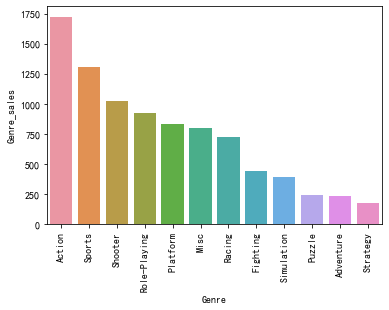

In [62]:
plt.plot(figsize=(12,6))
sns.barplot(x=favorite_game_genre.index,y='Genre_sales',data=favorite_game_genre)
plt.xticks(rotation=90)

#### 可以看出用户最喜爱的游戏类型是动作类、运动类、射击类。

In [63]:
favorite_game=pd.pivot_table(df,index='Year',columns='Name',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
print(favorite_game)

Name
Wii Sports                                                 82.74
Grand Theft Auto V                                         55.92
Super Mario Bros.                                          45.31
Tetris                                                     35.84
Mario Kart Wii                                             35.82
                                                           ...  
Princess Arthur                                             0.01
Sousaku Alice to Oujisama!                                  0.01
Fullmetal Alchemist: Prince of the Dawn                     0.01
Cities: Skylines Snowfall                                   0.01
Shutsugeki! Otometachi no Senjou 2: Ikusabana no Kizuna     0.01
Length: 11360, dtype: float64


In [64]:
favorite_game=pd.DataFrame(data=favorite_game,columns={'Genre_sales'})
favorite_game

,Genre_sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
...,...
Princess Arthur,0.01
Sousaku Alice to Oujisama!,0.01
Fullmetal Alchemist: Prince of the Dawn,0.01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

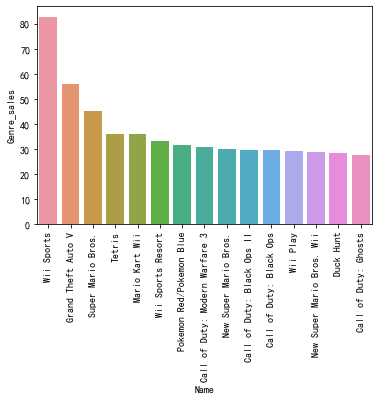

In [65]:
plt.plot(figsize=(12,6))
sns.barplot(x=favorite_game[:15].index,y='Genre_sales',data=favorite_game[:15])
plt.xticks(rotation=90)

####  可以看出用户最喜欢的游戏是Will Sports和 Grand Theft Auto V

In [66]:
favorite_game_platform=pd.pivot_table(df,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
print(favorite_game_platform)

Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.96
PS       727.39
GBA      313.56
PSP      291.71
PS4      278.10
PC       255.05
GB       254.42
XB       252.09
NES      251.07
3DS      246.28
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.63
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64


In [67]:
favorite_game_platform=pd.DataFrame(data=favorite_game_platform,columns={'Genre_sales'})
favorite_game_platform

,Genre_sales
Platform,
PS2,1233.46
X360,969.61
PS3,949.35
Wii,909.81
DS,818.96
PS,727.39
GBA,313.56
PSP,291.71
PS4,278.10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

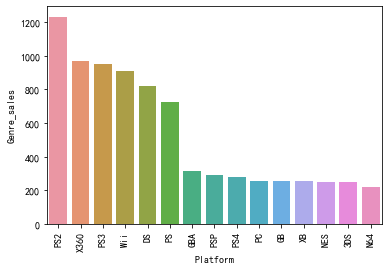

In [68]:
plt.plot(figsize=(12,6))
sns.barplot(x=favorite_game_platform[:15].index,y='Genre_sales',data=favorite_game_platform[:15])
plt.xticks(rotation=90)

#### 用户最喜欢的游戏发布平台是PS2和X360以及PS3

### 可视化应用

#### 可视化游戏市场的总体发展趋势

In [69]:
Sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [70]:
# 绘制各地区的销量走势
df5market_p=pd.pivot_table(df,index='Year',values=Sales,aggfunc=np.sum)

In [71]:
print(df5market_p)

        EU_Sales  Global_Sales  JP_Sales  NA_Sales  Other_Sales
Year                                                           
1980.0      0.67         11.38      0.00     10.59         0.12
1981.0      1.96         35.77      0.00     33.40         0.32
1982.0      1.65         28.86      0.00     26.92         0.31
1983.0      0.80         16.79      8.10      7.76         0.14
1984.0      2.10         50.36     14.27     33.28         0.70
1985.0      4.74         53.94     14.56     33.73         0.92
1986.0      2.84         37.07     19.81     12.50         1.93
1987.0      1.41         21.74     11.63      8.46         0.20
1988.0      6.59         47.22     15.76     23.87         0.99
1989.0      8.44         73.45     18.36     45.15         1.50
1990.0      7.63         49.39     14.88     25.46         1.40
1991.0      3.95         32.23     14.78     12.76         0.74
1992.0     11.71         76.16     28.91     33.87         1.65
1993.0      4.65         45.98     25.33

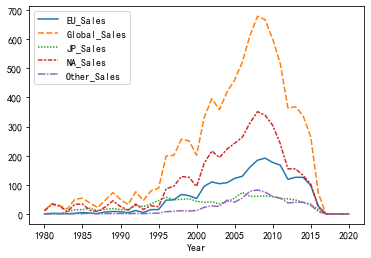

In [72]:
sns.lineplot(data=df5market_p)

#### 分析上图可以知道，从1995年开始，游戏市场的销量开始突然暴增，知道2008年左右达到最高峰，2010年之后开始暴跌。其中北美销量最大。

In [73]:
company = ['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16554  16557                                 Psychic Detective       PS   
16568  16571                                       XI Coliseum      PSP   
16584  16587                                  Bust-A-Move 3000       GC   
16591  16594                               Myst IV: Revelation       PC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   

         Year         Genre                    Publisher  NA_Sales  EU_Sales  \
0      2006.0      

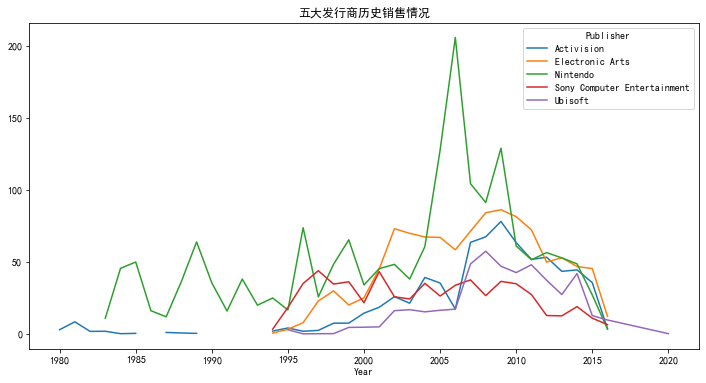

In [74]:
df5PBL=df[df['Publisher'].isin(company)]
print(df5PBL)
df5PBL_p=pd.pivot_table(data=df5PBL,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
df5PBL_p.plot(title='五大发行商历史销售情况',figsize=(12,6))

#### 可以看出Nintendo在2000-2010年的销量最高，但是之后开始下降。

### 预测每年电子游戏销售额

In [117]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [121]:
print(df)
lbe = LabelEncoder()
df['Genre']=lbe.fit_transform(df['Genre'])
df['Platform']=lbe.fit_transform(df['Platform'])
print(df.head())

        Rank                                              Name  Platform  \
0          1                                        Wii Sports        26   
1          2                                 Super Mario Bros.        11   
2          3                                    Mario Kart Wii        26   
3          4                                 Wii Sports Resort        26   
4          5                          Pokemon Red/Pokemon Blue         5   
...      ...                                               ...       ...   
16593  16596                Woody Woodpecker in Crazy Castle 5         6   
16594  16597                     Men in Black II: Alien Escape         7   
16595  16598  SCORE International Baja 1000: The Official Game        16   
16596  16599                                        Know How 2         4   
16597  16600                                  Spirits & Spells         6   

         Year  Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0      2

In [125]:
data = df.drop(['Rank', 'Name', 'Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Publisher', 'Other_Sales'],axis=1)
data.head()

,Platform,Genre,Global_Sales
0,26,10,82.74
1,11,4,40.24
2,26,6,35.82
3,26,10,33.00
4,5,7,31.37


In [99]:
#### 二元线性回归进行预测

       Global_Sales
0             82.74
1             40.24
2             35.82
3             33.00
4             31.37
...             ...
16593          0.01
16594          0.01
16595          0.01
16596          0.01
16597          0.01

[16598 rows x 1 columns]


In [126]:
data = preprocessing.normalize(data)
print(data)

[[2.97811530e-01 1.14542896e-01 9.47727924e-01]
 [2.62481426e-01 9.54477913e-02 9.60204780e-01]
 [5.82095199e-01 1.34329661e-01 8.01948079e-01]
 ...
 [9.36329017e-01 3.51123381e-01 5.85205636e-04]
 [6.24694286e-01 7.80867857e-01 1.56173571e-03]
 [8.32049494e-01 5.54699663e-01 1.38674916e-03]]


In [127]:
x = data[:,:2]
y = data[:,2]
print(x)
print(y)

[[0.29781153 0.1145429 ]
 [0.26248143 0.09544779]
 [0.5820952  0.13432966]
 ...
 [0.93632902 0.35112338]
 [0.62469429 0.78086786]
 [0.83204949 0.55469966]]
[9.47727924e-01 9.60204780e-01 8.01948079e-01 ... 5.85205636e-04
 1.56173571e-03 1.38674916e-03]


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(len(x_train), len(y_train), len(x_test), len(y_test))

13278 13278 3320 3320


In [132]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [133]:
# 打印权重
print(model.coef_)

[-0.55283947 -0.30506652]


In [135]:
# 打印偏置
print(model.intercept_)

0.6251705651820577


In [147]:
test_predict = model.predict(x_test)

In [148]:
# 使用RMSE值进行评测模型
rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
print(rmse_train)

0.07908722483360475


In [150]:
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
print(rmse_test)

0.07965915413955683


####  可以发现，训练集和测试集上的表现相差不大

####  使用r2进行评估

In [151]:
r2 = cross_val_score(model, x_train, y_train, cv = 10, scoring = "r2").mean()
print(r2)

0.34412435245098505


In [152]:
r2_test = cross_val_score(model, x_test, y_test, cv = 10, scoring = "r2").mean()
print(r2_test)

0.29050477048551987


##### 综上，二元线性回归的拟合程度较好